In [1]:
#HSV segmentation

In [2]:
%matplotlib inline

/Users/rolland/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
from matplotlib import pyplot as plt
from skimage import data,color, exposure,feature,io
from math import sqrt
from skimage.color import rgb2gray
import skimage.exposure as imexp
from skimage.filters import gabor_kernel
from PIL import Image
from scipy import ndimage as ndi
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import style

style.use('ggplot')

In [4]:
#loading data

In [5]:
# im1 = Image.open('onlineSamples/textures/1.jpg')
# im2 = Image.open('onlineSamples/textures/2.jpg')
# im3 = Image.open('onlineSamples/textures/3.jpg')



onlineSamples = []
onlineHsvSamples = []

imgSamples = [];
imgHsvSamples = [];


patches = [];
patchesHsv = [];


whitePatches = [];
whitePatchesHsv = [];

blackPatches = [];
blackPatchesHsv = [];


lessionPatches = [];
lessionPatchesHsv = [];



# npimg1 = np.array(im1)
# npimg2 = np.array(im2)
# npimg3 = np.array(im3)

# img_hsv1 = color.rgb2hsv(npimg1)
# img_hsv2 = color.rgb2hsv(npimg2)
# img_hsv3 = color.rgb2hsv(npimg3)


for i in range(0,3):
    onlineSamples.append(np.array(Image.open('onlineSamples/textures/'+str(i+1)+'.jpg')))
                      
for i in range(0,3):
    onlineHsvSamples.append(color.rgb2hsv(onlineSamples[i]))

for i in range(0,5):
    imgSamples.append(np.array(Image.open('samples_croped/'+str(i+1)+'.jpg')))
                      
for i in range(0,5):
    imgHsvSamples.append(color.rgb2hsv(imgSamples[i]))
    
    
for i in range(0,5):
    patches.append(np.array(Image.open('patches/'+str(i+1)+'.jpg')))
                      
for i in range(0,5):
    patchesHsv.append(color.rgb2hsv(patches[i]))
    
    
    
for i in range(0,3):
    whitePatches.append(np.array(Image.open('patches/white'+str(i+1)+'.jpg')))
                      
for i in range(0,3):
    whitePatchesHsv.append(color.rgb2hsv(whitePatches[i]))
    
    
for i in range(0,4):
    blackPatches.append(np.array(Image.open('patches/black'+str(i+1)+'.jpg')))
for i in range(0,4):
    blackPatchesHsv.append(color.rgb2hsv(blackPatches[i]))

    
    
for i in range(0,9):
    lessionPatches.append(np.array(Image.open('patches/lession'+str(i+1)+'.jpg')))
for i in range(0,9):
    lessionPatchesHsv.append(color.rgb2hsv(lessionPatches[i]))


print(len(imgHsvSamples))  
print(len(onlineHsvSamples)) 
print(len(patchesHsv)) 
print(len(whitePatchesHsv)) 
print(len(blackPatchesHsv)) 
print(len(lessionPatches)) 
print(imgHsvSamples[0].shape)
print(patchesHsv[0].shape)
print(whitePatchesHsv[0].shape)
print(blackPatchesHsv[0].shape)
print(lessionPatchesHsv[0].shape)


5
3
5
3
4
9
(1486, 1730, 3)
(100, 100, 3)
(50, 50, 3)
(100, 100, 3)
(44, 44, 3)


In [6]:
##saturation thresholding

In [7]:
def satThreshold(v,s):    ##return hue or intensity as dominant feature
    th = 1.0 - 0.8*v;
    if(s>th):
        return "h"
    else: 
        return "v"
    

In [8]:
def approximate(img):
    tmpImg = np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            dominantVal = satThreshold(img[i,j,2],img[i,j,1])
#             print("dominantVal----"+dominantVal)
            tmpImg[i,j,:] = img[i,j,:]
            if dominantVal == "h":
                tmpImg[i,j,0] = img[i,j,0]
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = 1.0
                
            else:
                tmpImg[i,j,0] = 1.0
                tmpImg[i,j,1] = 1.0
                tmpImg[i,j,2] = img[i,j,2]
        
    return tmpImg

In [9]:
##ploating online samples

In [10]:
##extrac main component

In [11]:
def extractMainComp(approx_img):
    #0.12 green , #0.67 blue , #0,1 red
      return ( (approx_img[:,:,0] < 0.3))

In [12]:
def extractMainHsvComp(approx_img,hsv_img):
    
    tmpImg = np.zeros(hsv_img.shape)
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            tmpImg[i,j,:] = hsv_img[i,j,:]
            if  not approx_img[i,j]: #turn to black
                tmpImg[i,j,0] = 0.
                tmpImg[i,j,1] = 0.
                tmpImg[i,j,2] = 0.      
        
    return tmpImg

In [13]:
##extract main hsv component based on approximated image result

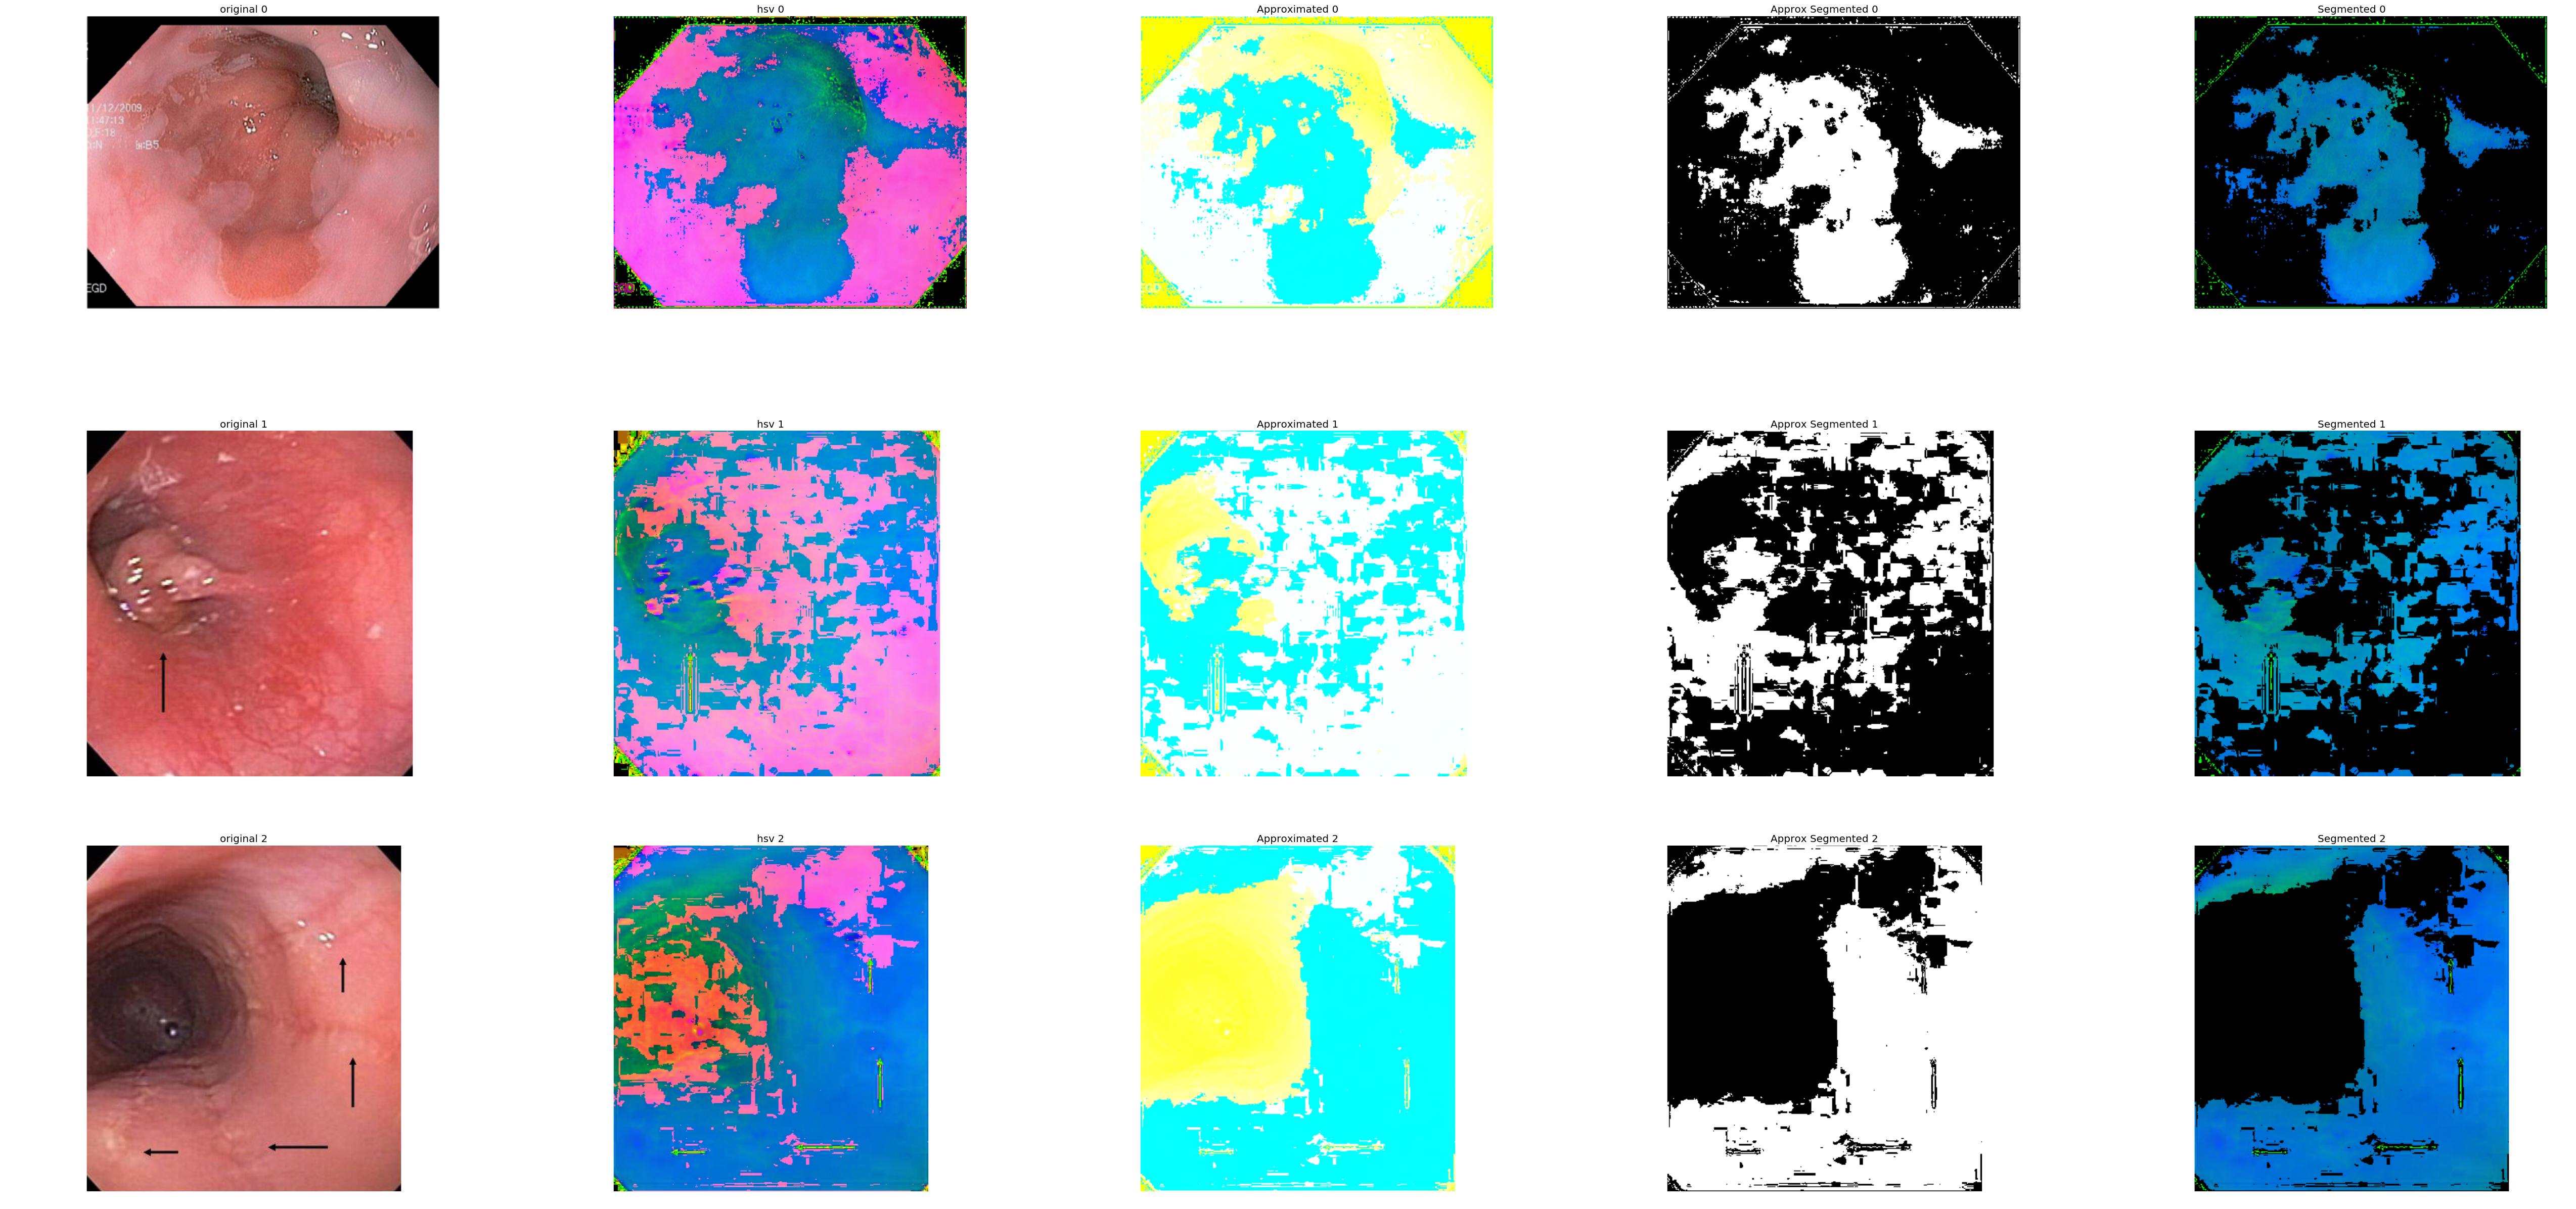

In [14]:
colnum = 5
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(onlineSamples)
# print(rownum)


fig, axes = plt.subplots(rownum, colnum, figsize=(65, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0

for i in range(0, len(onlineHsvSamples)):
    
    ax[index].imshow(onlineSamples[i],cmap='gray')
    ax[index].set_title("original "+str(i))
    ax[index].axis('off') 
    
    ax[index+1].imshow(onlineHsvSamples[i],cmap='gray')
    ax[index+1].set_title("hsv "+str(i))
    ax[index+1].axis('off') 
    
    ax[index+2].imshow(approximate(onlineHsvSamples[i]),cmap='gray')
    ax[index+2].set_title("Approximated "+str(i))
    ax[index+2].axis('off') 
    
    ax[index+3].imshow(extractMainComp(approximate(onlineHsvSamples[i])),cmap='gray')
    ax[index+3].set_title("Approx Segmented "+str(i))
    ax[index+3].axis('off')
    
    
    approximatedSeg = extractMainComp(approximate(onlineHsvSamples[i]))
    hsvSegmented = extractMainHsvComp(approximatedSeg,onlineHsvSamples[i])
    ax[index+4].imshow(hsvSegmented,cmap='gray')
    ax[index+4].set_title("Segmented "+str(i))
    ax[index+4].axis('off') 
    
    index +=5
    
plt.show()

In [15]:
###Gabor filter


def filterImage(image, kernels):
    feats = np.zeros((len(kernels), 2),np.uint8)
    filtered = []
    for k, kernel in enumerate(kernels):
        filtered.append(ndi.convolve(image, kernel, mode='wrap'))
#         feats[k, 0] = filtered.mean()
#         feats[k, 1] = filtered.var()
    return filtered

In [16]:
def compute_feats(image):
    feats = np.zeros((image.shape[0],image.shape[1],2),np.uint8)
    
    
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = image[max(i-1,0):min(i+1,image.shape[0]-1),max(j-1,0):min(j+1,image.shape[1]-1)]
            feats[i,j, 0] = window.mean()
            feats[i,j, 1] = window.var()
 
    return feats

In [17]:
def mass_compute_feats(images):
    feats = np.zeros((images[0].shape[0],images[0].shape[1],2*len(images)))
    feat_index = 0;
    
    for image in images:
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                window = image[max(i-1,0):min(i+1,image.shape[0]-1),max(j-1,0):min(j+1,image.shape[1]-1)]
       
                feats[i,j, feat_index] = window.mean()
                feats[i,j, feat_index+1] = window.var()
                
        feat_index+=2
 
    return feats

In [18]:
def mass_compute_feats2(images):
    feats = np.zeros((images[0].shape[0],images[0].shape[1],len(images)))
    
    for k in range(len(images)):
        for i in range(images[k].shape[0]):
            for j in range(images[k].shape[1]):
                
                feats[i,j, k] = images[k][i,j]
        
#     print("images[0].shape[0]----",images[0].shape[0])   
 
    return feats

In [19]:
def mass_compute_feats3(images):
    feats = np.zeros((images[0].shape[0],images[0].shape[1],2*len(images)))
    
    
    for k in range(len(images)):
        for i in range(images[k].shape[0]):
            for j in range(images[k].shape[1]):
                window = images[k][max(i-1,0):min(i+1,images[k].shape[0]-1),max(j-1,0):min(j+1,images[k].shape[1]-1)]
                
                feats[i,j, 2*k] = np.sum(np.square(window))
                feats[i,j, 2*k+1] = np.sum(window)
 
    return feats

In [20]:
def add_color_feats(hsvImg,grayScaleFeats):
    newDim =  grayScaleFeats.shape[2]+3
    newFeats = np.zeros((hsvImg.shape[0],hsvImg.shape[1],newDim))
    
    for k in range(grayScaleFeats.shape[0]):
        for l in range(grayScaleFeats.shape[1]):
            for h in range(grayScaleFeats.shape[2]):
                newFeats[k,l,h] = grayScaleFeats[k,l,h]
#                 print(newFeats[k,l,h])
            newFeats[k,l,grayScaleFeats.shape[2]] = hsvImg[k,l,0]
#             print(newFeats[k,l,newDim-3])
            newFeats[k,l,grayScaleFeats.shape[2]+1] = hsvImg[k,l,1]
#             print(newFeats[k,l,newDim-2])
            newFeats[k,l,grayScaleFeats.shape[2]+2] = hsvImg[k,l,2]
 
    return newFeats

In [21]:
def add_color_feats2(hsvImg,aprocHsvImg,grayScaleFeats):
    newDim =  grayScaleFeats.shape[2]+6
    newFeats = np.zeros((hsvImg.shape[0],hsvImg.shape[1],newDim))
    
    for k in range(grayScaleFeats.shape[0]):
        for l in range(grayScaleFeats.shape[1]):
            for h in range(grayScaleFeats.shape[2]):
                newFeats[k,l,h] = grayScaleFeats[k,l,h]
            newFeats[k,l,grayScaleFeats.shape[2]] = hsvImg[k,l,0]
            newFeats[k,l,grayScaleFeats.shape[2]+1] = hsvImg[k,l,1]
            newFeats[k,l,grayScaleFeats.shape[2]+2] = hsvImg[k,l,2]
            newFeats[k,l,grayScaleFeats.shape[2]+3] = aprocHsvImg[k,l,0]
            newFeats[k,l,grayScaleFeats.shape[2]+4] = aprocHsvImg[k,l,1]
            newFeats[k,l,grayScaleFeats.shape[2]+5] = aprocHsvImg[k,l,2]

 
    return newFeats

In [22]:



def ref_img_feats():
    
#     print("ref images features")
    
    ref_feats = {}
    
#     print("patchesHsv[0]")
#     print(patchesHsv[0].shape)
#     print(patchesHsv[0])

   
    for i in range(len(patchesHsv)):
        imgToFilter = rgb2gray(patches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats(patchesHsv[i],mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('ref_feats[i]------arranged---')
#     print ref_feats[0][0]
        
    return ref_feats
         

In [23]:


def ref_img_feats2():
    
#     print("ref images features")
    
    ref_feats = {}
    
#     print("patchesHsv[0]")
#     print(patchesHsv[0].shape)
#     print(patchesHsv[0])

   
    for i in range(len(patchesHsv)):
        imgToFilter = rgb2gray(patches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats2(patchesHsv[i],approximate(patchesHsv[i]),mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('ref_feats[i]------arranged---')
#     print ref_feats[0][0]
        
    return ref_feats

In [24]:
# print(ref_img_feats())

In [25]:

def ref_white_img_feats():
    
#     print("ref white images features")
#     print(whitePatchesHsv[0].shape)
    
    ref_feats = {}
    
    for i in range(len(whitePatchesHsv)):
        imgToFilter = rgb2gray(whitePatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats(whitePatchesHsv[i],mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('white ref_feats[i]------arranged---')
#     print ref_feats
        
    return ref_feats

In [26]:
def ref_white_img_feats2():
    
#     print("ref white images features")
#     print(whitePatchesHsv[0].shape)
    
    ref_feats = {}
    
    for i in range(len(whitePatchesHsv)):
        imgToFilter = rgb2gray(whitePatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats2(whitePatchesHsv[i],approximate(whitePatchesHsv[i]),mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('white ref_feats[i]------arranged---')
#     print ref_feats
        
    return ref_feats

In [27]:
# print(ref_white_img_feats())

In [28]:
def ref_black_img_feats():
    
#     print("ref white images features")
    
    ref_feats = {}
    
    for i in range(len(blackPatchesHsv)):
        imgToFilter = rgb2gray(blackPatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats(blackPatchesHsv[i],mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('black ref_feats[i]------arranged---')
#     print ref_feats[0][0]
        
    return ref_feats

In [29]:
def ref_black_img_feats2():
    
#     print("ref white images features")
    
    ref_feats = {}
    
    for i in range(len(blackPatchesHsv)):
        imgToFilter = rgb2gray(blackPatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats2(blackPatchesHsv[i],approximate(blackPatchesHsv[i]),mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
#     print('black ref_feats[i]------arranged---')
#     print ref_feats[0][0]
        
    return ref_feats

In [30]:

def ref_lession_img_feats():
    
#     print("ref white images features")
    
    ref_feats = {}
    
    for i in range(len(lessionPatchesHsv)):
        imgToFilter = rgb2gray(lessionPatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats(lessionPatchesHsv[i],mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
    return ref_feats

In [31]:

def ref_lession_img_feats2():
    
#     print("ref white images features")
    
    ref_feats = {}
    
    for i in range(len(lessionPatchesHsv)):
        imgToFilter = rgb2gray(lessionPatches[i])
        filtredImg = filterImage(imgToFilter,kernels)
        ref_feats[i] = add_color_feats2(lessionPatchesHsv[i],approximate(lessionPatchesHsv[i]),mass_compute_feats(filtredImg))
        ref_feats[i] = np.mean(ref_feats[i], axis=0)
        
    return ref_feats

In [32]:
# print ref_lession_img_feats()

In [33]:
###k-means for features


####k-means class



class K_Means_Feats:
    def __init__(self, k=10, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter
        self.rgbColors = np.array([[0,255,0],[255,255,255],[0,0,0],[255,0,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],[51,51,255],[102,102,0],[255,0,127],[160,32,240],[238,130,238]])
        self.rgbColors.astype(float)
#        white, green, ,red, yellow, purple,violet



    
    
    def fit(self,img):

        self.centroids = {}
        
        tempImg = img
        ###assign initial centroids
        ref_feats_normal = ref_img_feats()
        ref_feats_white = ref_white_img_feats()
        ref_feats_black = ref_black_img_feats()
        ref_feats_lession = ref_lession_img_feats()
        
#         print("ref_feats_normal")
#         print(ref_feats_normal)
#         print("ref_feats_white")
#         print(ref_feats_white)
#         print("ref_feats_black")
#         print(ref_feats_black)

        p_index = len(patches)
        w_p_index = len(patches)+len(whitePatches)
        b_p_index = len(patches)+len(whitePatches)+len(blackPatches)
        
        print('indeces----')
        print p_index
        print w_p_index
#         print b_p_index
        
        #centroids for normal parts of the esophagus
        for i in range(len(patches)):
            self.centroids[i] = ref_feats_normal[i][0]
        #centroids for white and bright parts
        for i in range(len(whitePatches)):
            self.centroids[p_index+i] = ref_feats_white[i][0]
        #centroids for black parts
        for i in range(len(blackPatches)):
            self.centroids[w_p_index+i] = ref_feats_black[i][0] 
            
        for i in range(len(lessionPatches)):
            self.centroids[b_p_index+i] = ref_feats_lession[i][0]     
        #ramdomly select centroid for the lessions   
#         self.centroids[self.k-1] = img[0,0,:]
            
            
            
            
      
        print("k----")
        print(self.k)
        print("centroids----")
#         print(self.centroids)

        for i in range(self.max_iter):
            self.clusters = {}
            self.clustersIndeces = {}
                ##classes holder
            for i in range(self.k):
                self.clusters[i] = []
                self.clustersIndeces[i] = []
        
            for i in range(img.shape[0]):
                for j in range(img.shape[1]):
                    distances = [np.linalg.norm(img[i,j,:]-self.centroids[centroid]) for centroid in self.centroids]
                    clust_index = distances.index(min(distances))
                    self.clustersIndeces[clust_index].append([i,j])
                    self.clusters[clust_index].append(img[i,j,:])
                    
                    
            prev_centroids = dict(self.centroids)         
            
            
            
            ##  re-assign centroids 
            for item in self.clusters:
                self.centroids[item] = np.average(self.clusters[item],axis=0)

            optimized = True
            
            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/((original_centroid)*100.0)) > self.tol:
                    optimized = False

            if optimized:
                break
        
        output = np.zeros((img.shape[0],img.shape[1],3),np.uint8); 
        
##assigning colors  

        for cent in self.centroids:
            for pair in self.clustersIndeces[cent]:
                
                
                if  (cent < p_index): #normal pixels
                    output[pair[0],pair[1],0] = self.rgbColors[0][0]
                    output[pair[0],pair[1],1] = self.rgbColors[0][1]
                    output[pair[0],pair[1],2] = self.rgbColors[0][2]
                    
                elif  (cent >= p_index) & (cent < w_p_index): #white pixels
                    output[pair[0],pair[1],0] = self.rgbColors[1][0]
                    output[pair[0],pair[1],1] = self.rgbColors[1][1]
                    output[pair[0],pair[1],2] = self.rgbColors[1][2]
                    
                elif  (cent >= w_p_index) & (cent < b_p_index): # black pixels
                    output[pair[0],pair[1],0] = self.rgbColors[2][0]
                    output[pair[0],pair[1],1] = self.rgbColors[2][1]
                    output[pair[0],pair[1],2] = self.rgbColors[2][2] 
                    
                elif  (cent >= b_p_index): #lessions
                    output[pair[0],pair[1],0] = self.rgbColors[3][0]
                    output[pair[0],pair[1],1] = self.rgbColors[3][1]
                    output[pair[0],pair[1],2] = self.rgbColors[3][2] 
                    
                    
                    
             
                
        return output


In [34]:
# prepare filter bank kernels
kernels = []

for theta in np.arange(0, np.pi, np.pi / 6):
    for sigma in (1.0,1.25,1.5):  #gausian kernel window size
        for frequency in (0.1, 0.2):
#              0 < FL(i) < 0.25 and 0.25 ≤ FH (i) < 0.5.
            kernel = np.real(gabor_kernel(frequency, theta=theta,sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

In [35]:
###applying to online samples

len(filtredImg)
36
(352, 424)
indeces----
5
8
k----
21
centroids----


/Users/rolland/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


indeces----
5
8
k----
21
centroids----
indeces----
5
8
k----
21
centroids----


ValueError: operands could not be broadcast together with shapes (78,) (75,) 

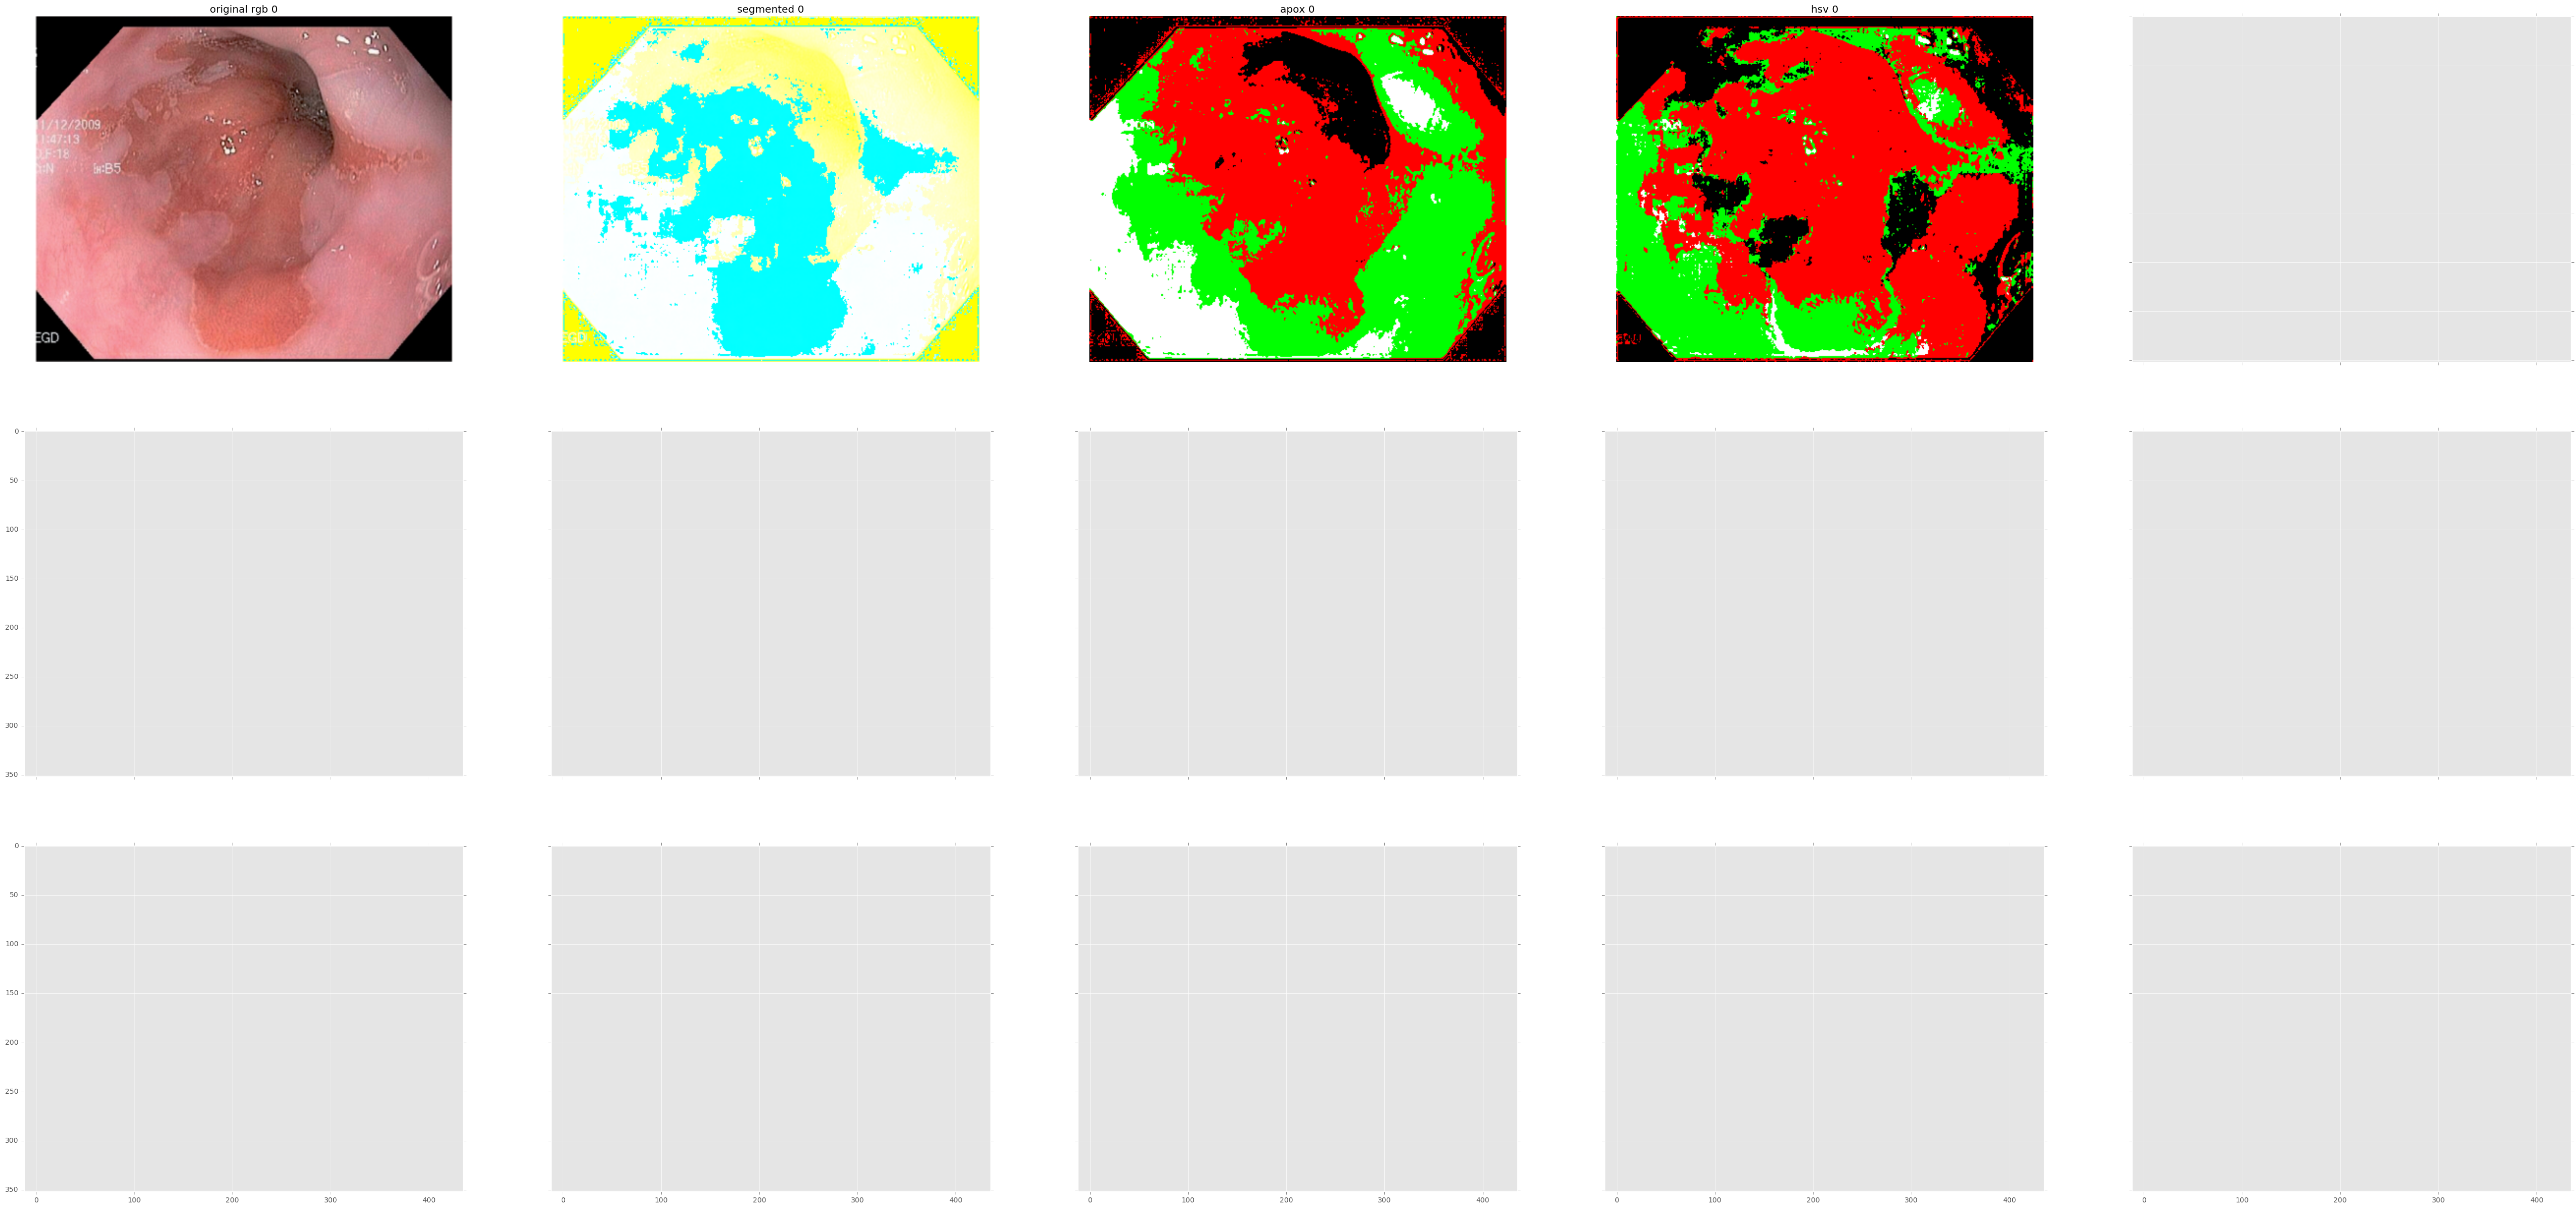

In [36]:
colnum = 5
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(onlineSamples)
# print(rownum)



fig, axes = plt.subplots(rownum, colnum, figsize=(65, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0

# divide into white, black, normal and abonomal parts of the esophagus
kmeanf = K_Means_Feats(len(patches)+len(whitePatches)+len(blackPatches)+len(lessionPatches))

for i in range(0, len(onlineHsvSamples)):
    
    imgToFilter = rgb2gray(onlineSamples[i])
    
    filtredImg = filterImage(imgToFilter,kernels)
   
    
    print("len(filtredImg)")
    print(len(filtredImg))
    print(filtredImg[0].shape)
    
    ax[index].imshow(onlineSamples[i],cmap='gray')
    ax[index].set_title("original rgb "+str(i))
    ax[index].axis('off') 
   
    ax[index+1].imshow(approximate(onlineHsvSamples[i]),cmap='gray')
    ax[index+1].set_title("segmented "+str(i))
    ax[index+1].axis('off')
    
    ax[index+2].imshow(kmeanf.fit(add_color_feats(approximate(onlineHsvSamples[i]),mass_compute_feats(filtredImg))),cmap='gray')
    ax[index+2].set_title("apox "+str(i))
    ax[index+2].axis('off') 

    
    ax[index+3].imshow(kmeanf.fit(add_color_feats(onlineHsvSamples[i],mass_compute_feats(filtredImg))) ,cmap='gray')
    ax[index+3].set_title("hsv "+str(i))
    ax[index+3].axis('off')
    
     
    ax[index+4].imshow(kmeanf.fit(add_color_feats2(onlineHsvSamples[i],approximate(onlineHsvSamples[i]),mass_compute_feats(filtredImg))) ,cmap='gray')
    ax[index+4].set_title("both "+str(i))
    ax[index+4].axis('off')
    
    index += colnum
    
plt.show()

In [ ]:
##applying to imgSamples

In [ ]:
colnum = 4
# rownum = int(math.floor((float(len(imgSamples))/ float(colnum))+1))
rownum = len(imgSamples)
# print(rownum)



fig, axes = plt.subplots(rownum, colnum, figsize=(65, rownum*10), sharex=True, sharey=True)
ax = axes.ravel()
index = 0

# divide into white, black, normal and abonomal parts of the esophagus
kmeanf = K_Means_Feats(len(patches)+len(whitePatches)+len(blackPatches)+len(lessionPatches))

for i in range(0, len(imgHsvSamples)):
    
    imgToFilter = rgb2gray(imgSamples[i])
    
    filtredImg = filterImage(imgToFilter,kernels)
   
    
    print("len(filtredImg)")
    print(len(filtredImg))
    print(filtredImg[0].shape)
    
    ax[index].imshow(imgSamples[i],cmap='gray')
    ax[index].set_title("original rgb "+str(i))
    ax[index].axis('off') 
    
    ax[index+1].imshow(imgToFilter,cmap='gray')
    ax[index+1].set_title("original "+str(i))
    ax[index+1].axis('off')  
    
    ax[index+2].imshow(approximate(imgHsvSamples[i]),cmap='gray')
    ax[index+2].set_title("segmented "+str(i))
    ax[index+2].axis('off')
    
    ax[index+3].imshow(kmeanf.fit(add_color_feats2(imgHsvSamples[i],approximate(imgHsvSamples[i]),mass_compute_feats(filtredImg))) ,cmap='gray')
    ax[index+3].set_title("segmented "+str(i))
    ax[index+3].axis('off')
    index += colnum
    
plt.show()